In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn import pipeline
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, chi2, SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score, f1_score, precision_recall_curve, plot_precision_recall_curve, average_precision_score, auc
from sklearn.svm import SVR, LinearSVR, SVC, LinearSVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from scipy import stats
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix
import numpy as np


# Prepare Data

In [ ]:
house_hold_data = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/3.Arch_2_Procedure/5.Train_Regression_and_Classification_Models/Outputs/2011/Percentage_of_Households_LitMslAdded.pickle','rb'))

In [ ]:
house_hold_data

,BF_RUD,BF_INT,BF_ADV,CHH_RUD,CHH_INT,CHH_ADV,FC_RUD,FC_INT,FC_ADV,MSW_RUD,MSW_INT,MSW_ADV,TV,Tele,2w,4w,MSL_RUD,MSL_INT,MSL_ADV,LIT
347135.0,99.2,0.0,0.8,47.0,47.0,6.1,100.0,0.0,0.0,18.2,81.8,0.0,5.3,25.0,6.1,0.0,0.0,100.0,0.0,41.255605
347136.0,100.0,0.0,0.0,66.2,30.8,3.0,83.3,16.7,0.0,14.6,84.8,0.5,1.0,11.1,1.5,0.0,0.0,100.0,0.0,51.055276
347137.0,98.3,0.0,1.5,5.0,94.3,0.8,97.5,2.5,0.0,10.2,89.7,0.2,1.3,21.4,1.7,0.0,0.0,98.7,1.3,45.053533
347138.0,98.8,0.0,1.2,42.5,55.9,1.6,70.9,28.6,0.2,6.6,93.5,0.0,8.9,63.1,7.1,0.6,0.0,77.7,22.3,50.786948
347139.0,97.7,2.1,0.2,6.6,87.5,5.9,99.8,0.2,0.0,28.4,70.4,1.2,1.4,32.4,6.6,0.7,0.0,100.0,0.0,52.052307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597104.0,96.1,0.4,3.4,69.8,24.7,5.4,88.7,0.6,10.6,2.0,4.1,93.9,39.3,51.6,18.0,0.7,0.4,12.8,86.8,60.180542
597105.0,100.0,0.0,0.0,100.0,0.0,0.0,91.3,7.2,1.4,0.0,14.4,85.5,53.6,62.3,43.5,0.0,0.0,0.0,100.0,72.413793
597106.0,99.0,0.0,1.0,79.2,8.3,12.5,58.3,4.2,37.5,2.0,5.2,92.7,43.8,61.4,26.0,2.1,0.0,9.4,90.6,64.454976
597107.0,100.0,0.0,0.0,44.0,36.0,20.0,93.3,2.7,4.0,0.0,0.0,100.0,17.3,40.0,14.7,5.3,0.0,4.0,96.0,63.456790


In [ ]:
adi_bf = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/2011_Original(Ground_Truth)_ADI_without_outlier/2011_ADI_orginal_bf_without_outlier.pickle','rb'))

In [ ]:
house_hold_data[house_hold_data.index==27378.0]

,BF_RUD,BF_INT,BF_ADV,CHH_RUD,CHH_INT,CHH_ADV,FC_RUD,FC_INT,FC_ADV,MSW_RUD,MSW_INT,MSW_ADV,TV,Tele,2w,4w,MSL_RUD,MSL_INT,MSL_ADV,LIT
27378.0,69.4,0.0,30.6,53.6,45.9,0.5,97.8,0.0,1.6,8.2,0.0,91.8,74.9,80.3,25.1,4.4,1.1,1.6,97.3,67.018779


In [ ]:
adi_bf

,State,District,Subdistt,Town/Village(Code),Ward,Name,BF_RUD,BF_INT,BF_ADV,BF_ADI
0,3,35,200,27378,0,Ghar (408),69.4,0.0,30.6,1
1,3,35,200,27379,0,Barsudhal (409),95.9,0.0,4.2,1
2,3,35,200,27380,0,Dunera (418),70.8,0.0,29.0,1
3,3,35,200,27381,0,Bhamlada (410),81.6,13.3,4.9,1
4,3,35,200,27382,0,Nalloh (411),87.4,0.0,12.4,1
...,...,...,...,...,...,...,...,...,...,...
340948,33,633,5902,644661,0,Kannankoil,79.3,11.8,8.9,1
340949,33,633,5902,644682,0,Chitravathanpalayam,35.9,6.7,52.4,3
340950,33,633,5902,644683,0,Nanjiyampalayam,57.2,17.1,25.4,3
340951,33,633,5902,644687,0,Verajimangalam,73.2,8.1,18.7,1


In [ ]:
adi_bf = adi_bf.rename(columns={"Town/Village(Code)":"2011_village_id"})

In [ ]:
adi_and_household = adi_bf[["2011_village_id","BF_RUD","BF_INT","BF_ADV","BF_ADI"]]

In [ ]:
adi_and_household = adi_and_household.set_index("2011_village_id")

In [ ]:
adi_and_household 

,BF_RUD,BF_INT,BF_ADV,BF_ADI
2011_village_id,,,,
27378,69.4,0.0,30.6,1
27379,95.9,0.0,4.2,1
27380,70.8,0.0,29.0,1
27381,81.6,13.3,4.9,1
27382,87.4,0.0,12.4,1
...,...,...,...,...
644661,79.3,11.8,8.9,1
644682,35.9,6.7,52.4,3
644683,57.2,17.1,25.4,3


In [ ]:
adi_fc = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/2011_Original(Ground_Truth)_ADI_without_outlier/2011_ADI_orginal_fc_without_outlier.pickle','rb'))

In [ ]:
adi_fc

,State,District,Subdistt,Town/Village(Code),Ward,Name,FC_RUD,FC_INT,FC_ADV,FC_ADI
0,3,35,200,27378,0,Ghar (408),97.8,0.0,1.6,1
1,3,35,200,27379,0,Barsudhal (409),95.9,1.2,3.0,1
2,3,35,200,27380,0,Dunera (418),73.4,1.0,25.6,1
3,3,35,200,27381,0,Bhamlada (410),92.1,3.7,4.1,1
4,3,35,200,27382,0,Nalloh (411),95.0,2.9,2.1,1
...,...,...,...,...,...,...,...,...,...,...
340948,33,633,5902,644661,0,Kannankoil,57.2,7.8,34.0,3
340949,33,633,5902,644682,0,Chitravathanpalayam,20.5,7.8,71.3,3
340950,33,633,5902,644683,0,Nanjiyampalayam,43.8,6.2,49.5,3
340951,33,633,5902,644687,0,Verajimangalam,51.0,4.5,43.5,3


In [ ]:
adi_fc = adi_fc[["Town/Village(Code)","FC_RUD","FC_INT","FC_ADV","FC_ADI"]]

In [ ]:
adi_fc

,Town/Village(Code),FC_RUD,FC_INT,FC_ADV,FC_ADI
0,27378,97.8,0.0,1.6,1
1,27379,95.9,1.2,3.0,1
2,27380,73.4,1.0,25.6,1
3,27381,92.1,3.7,4.1,1
4,27382,95.0,2.9,2.1,1
...,...,...,...,...,...
340948,644661,57.2,7.8,34.0,3
340949,644682,20.5,7.8,71.3,3
340950,644683,43.8,6.2,49.5,3
340951,644687,51.0,4.5,43.5,3


In [ ]:
adi_and_household = adi_and_household.merge(adi_fc,how="inner",left_index=True,right_on="Town/Village(Code)").set_index(adi_and_household.index)

In [ ]:
adi_and_household

,BF_RUD,BF_INT,BF_ADV,BF_ADI,Town/Village(Code),FC_RUD,FC_INT,FC_ADV,FC_ADI
2011_village_id,,,,,,,,,
27378,69.4,0.0,30.6,1,27378,97.8,0.0,1.6,1
27379,95.9,0.0,4.2,1,27379,95.9,1.2,3.0,1
27380,70.8,0.0,29.0,1,27380,73.4,1.0,25.6,1
27381,81.6,13.3,4.9,1,27381,92.1,3.7,4.1,1
27382,87.4,0.0,12.4,1,27382,95.0,2.9,2.1,1
...,...,...,...,...,...,...,...,...,...
644661,79.3,11.8,8.9,1,644661,57.2,7.8,34.0,3
644682,35.9,6.7,52.4,3,644682,20.5,7.8,71.3,3
644683,57.2,17.1,25.4,3,644683,43.8,6.2,49.5,3


In [ ]:
del adi_and_household['Town/Village(Code)']

In [ ]:
adi_asset = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/2011_Original(Ground_Truth)_ADI_without_outlier/2011_ADI_orginal_asset_without_outlier.pickle','rb'))

In [ ]:
adi_asset

,State,District1,District,Ward,Name,TV,Cyc,Tele,2w,4w,Town/Village(Code),ASSET_ADI
0,3,43,34223,0,Jhanda Bagga Nawan(108),93.1,90.8,90.1,50.4,18.3,34223,3
1,3,43,34224,0,Bal (109),89.4,70.2,93.3,53.8,16.3,34224,3
2,3,43,34225,0,Buh Gujran (112),69.1,71.8,80.0,32.7,10.0,34225,3
3,3,43,34228,0,Sharaf Ali Shahwala (100),51.3,80.8,68.0,33.3,2.6,34228,3
4,3,43,34230,0,Khiali (96),51.7,81.0,63.7,27.6,1.7,34230,3
...,...,...,...,...,...,...,...,...,...,...,...,...
340948,33,632,644433,0,Veerapandi,86.4,12.9,56.1,23.2,4.3,644433,3
340949,33,632,644434,0,Nanjundapuram,83.2,28.2,72.9,36.1,4.6,644434,3
340950,33,632,644447,0,Thennammanallur,85.3,44.0,59.9,35.5,4.8,644447,3
340951,33,632,644448,0,Devarayapuram,83.6,43.3,63.9,33.9,4.2,644448,3


In [ ]:
adi_asset = adi_asset[["Town/Village(Code)","TV","Tele","2w","4w","ASSET_ADI"]]

In [ ]:
adi_asset

,Town/Village(Code),TV,Tele,2w,4w,ASSET_ADI
0,34223,93.1,90.1,50.4,18.3,3
1,34224,89.4,93.3,53.8,16.3,3
2,34225,69.1,80.0,32.7,10.0,3
3,34228,51.3,68.0,33.3,2.6,3
4,34230,51.7,63.7,27.6,1.7,3
...,...,...,...,...,...,...
340948,644433,86.4,56.1,23.2,4.3,3
340949,644434,83.2,72.9,36.1,4.6,3
340950,644447,85.3,59.9,35.5,4.8,3
340951,644448,83.6,63.9,33.9,4.2,3


In [ ]:
adi_and_household = adi_and_household.merge(adi_asset,how="inner",left_index=True,right_on="Town/Village(Code)").set_index(adi_and_household.index)

In [ ]:
del adi_and_household['Town/Village(Code)']

In [ ]:
adi_and_household

,BF_RUD,BF_INT,BF_ADV,BF_ADI,FC_RUD,FC_INT,FC_ADV,FC_ADI,TV,Tele,2w,4w,ASSET_ADI
2011_village_id,,,,,,,,,,,,,
27378,69.4,0.0,30.6,1,97.8,0.0,1.6,1,74.9,80.3,25.1,4.4,3
27379,95.9,0.0,4.2,1,95.9,1.2,3.0,1,56.2,75.7,13.0,1.8,3
27380,70.8,0.0,29.0,1,73.4,1.0,25.6,1,76.2,67.0,24.2,5.4,3
27381,81.6,13.3,4.9,1,92.1,3.7,4.1,1,76.9,82.2,21.0,3.7,3
27382,87.4,0.0,12.4,1,95.0,2.9,2.1,1,64.7,79.8,24.3,3.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,79.3,11.8,8.9,1,57.2,7.8,34.0,3,83.5,63.7,37.9,2.1,3
644682,35.9,6.7,52.4,3,20.5,7.8,71.3,3,88.8,80.6,65.0,7.6,3
644683,57.2,17.1,25.4,3,43.8,6.2,49.5,3,88.0,67.3,44.3,2.4,3


In [ ]:
adi_lit = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/2011_Original(Ground_Truth)_ADI_without_outlier/2011_ADI_orginal_lit_without_outlier.pickle','rb'))

In [ ]:
adi_lit

,State,District,Subdistt,Town/Village(Code),Ward,Name,literacy_percent_2011,Label,State_name
0,3,35,200,27378,0,Ghar (408),67.018779,3,PB
1,3,35,200,27379,0,Barsudhal (409),71.282051,3,PB
2,3,35,200,27380,0,Dunera (418),71.86251,3,PB
3,3,35,200,27381,0,Bhamlada (410),73.82088,3,PB
4,3,35,200,27382,0,Nalloh (411),66.592029,3,PB
...,...,...,...,...,...,...,...,...,...
340948,33,633,5902,644661,0,Kannankoil,61.115414,3,TN
340949,33,633,5902,644682,0,Chitravathanpalayam,74.19953,3,TN
340950,33,633,5902,644683,0,Nanjiyampalayam,67.685371,3,TN
340951,33,633,5902,644687,0,Verajimangalam,65.852932,3,TN


In [ ]:
adi_lit = adi_lit[["Town/Village(Code)","literacy_percent_2011","Label"]]

In [ ]:
adi_lit

,Town/Village(Code),literacy_percent_2011,Label
0,27378,67.018779,3
1,27379,71.282051,3
2,27380,71.86251,3
3,27381,73.82088,3
4,27382,66.592029,3
...,...,...,...
340948,644661,61.115414,3
340949,644682,74.19953,3
340950,644683,67.685371,3
340951,644687,65.852932,3


In [ ]:
adi_lit = adi_lit.rename(columns={"literacy_percent_2011":"LIT_percent","Label":"LIT_ADI"})

In [ ]:
adi_lit

,Town/Village(Code),LIT_percent,LIT_ADI
0,27378,67.018779,3
1,27379,71.282051,3
2,27380,71.86251,3
3,27381,73.82088,3
4,27382,66.592029,3
...,...,...,...
340948,644661,61.115414,3
340949,644682,74.19953,3
340950,644683,67.685371,3
340951,644687,65.852932,3


In [ ]:
adi_and_household = adi_and_household.merge(adi_lit,how="inner",left_index=True,right_on="Town/Village(Code)").set_index(adi_and_household.index)

In [ ]:
del adi_and_household['Town/Village(Code)']

In [ ]:
adi_and_household

,BF_RUD,BF_INT,BF_ADV,BF_ADI,FC_RUD,FC_INT,FC_ADV,FC_ADI,TV,Tele,2w,4w,ASSET_ADI,LIT_percent,LIT_ADI
2011_village_id,,,,,,,,,,,,,,,
27378,69.4,0.0,30.6,1,97.8,0.0,1.6,1,74.9,80.3,25.1,4.4,3,67.018779,3
27379,95.9,0.0,4.2,1,95.9,1.2,3.0,1,56.2,75.7,13.0,1.8,3,71.282051,3
27380,70.8,0.0,29.0,1,73.4,1.0,25.6,1,76.2,67.0,24.2,5.4,3,71.86251,3
27381,81.6,13.3,4.9,1,92.1,3.7,4.1,1,76.9,82.2,21.0,3.7,3,73.82088,3
27382,87.4,0.0,12.4,1,95.0,2.9,2.1,1,64.7,79.8,24.3,3.9,3,66.592029,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,79.3,11.8,8.9,1,57.2,7.8,34.0,3,83.5,63.7,37.9,2.1,3,61.115414,3
644682,35.9,6.7,52.4,3,20.5,7.8,71.3,3,88.8,80.6,65.0,7.6,3,74.19953,3
644683,57.2,17.1,25.4,3,43.8,6.2,49.5,3,88.0,67.3,44.3,2.4,3,67.685371,3


In [ ]:
adi_msw = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/2011_Original(Ground_Truth)_ADI_without_outlier/2011_ADI_orginal_msw_without_outlier.pickle','rb'))

In [ ]:
adi_msw

,State,District,Subdistt,Town/Village(Code),Ward,Name,MSW_RUD,MSW_INT,MSW_ADV,MSW_ADI
0,3,35,200,27378,0,Ghar (408),8.2,0.0,91.8,3
1,3,35,200,27379,0,Barsudhal (409),1.8,8.3,90.0,3
2,3,35,200,27380,0,Dunera (418),0.8,0.0,99.2,3
3,3,35,200,27381,0,Bhamlada (410),1.4,0.0,98.7,3
4,3,35,200,27382,0,Nalloh (411),5.2,5.5,89.2,3
...,...,...,...,...,...,...,...,...,...,...
340948,33,633,5902,644661,0,Kannankoil,3.3,22.8,73.9,3
340949,33,633,5902,644682,0,Chitravathanpalayam,9.8,20.2,70.0,3
340950,33,633,5902,644683,0,Nanjiyampalayam,1.6,3.0,95.4,3
340951,33,633,5902,644687,0,Verajimangalam,1.9,13.5,84.6,3


In [ ]:
adi_msw = adi_msw[["Town/Village(Code)","MSW_RUD","MSW_INT","MSW_ADV","MSW_ADI"]]

In [ ]:
adi_msw

,Town/Village(Code),MSW_RUD,MSW_INT,MSW_ADV,MSW_ADI
0,27378,8.2,0.0,91.8,3
1,27379,1.8,8.3,90.0,3
2,27380,0.8,0.0,99.2,3
3,27381,1.4,0.0,98.7,3
4,27382,5.2,5.5,89.2,3
...,...,...,...,...,...
340948,644661,3.3,22.8,73.9,3
340949,644682,9.8,20.2,70.0,3
340950,644683,1.6,3.0,95.4,3
340951,644687,1.9,13.5,84.6,3


In [ ]:
adi_and_household = adi_and_household.merge(adi_msw,how="inner",left_index=True,right_on="Town/Village(Code)").set_index(adi_and_household.index)

In [ ]:
del adi_and_household['Town/Village(Code)']

In [ ]:
adi_and_household

,BF_RUD,BF_INT,BF_ADV,BF_ADI,FC_RUD,FC_INT,FC_ADV,FC_ADI,TV,Tele,2w,4w,ASSET_ADI,LIT_percent,LIT_ADI,MSW_RUD,MSW_INT,MSW_ADV,MSW_ADI
2011_village_id,,,,,,,,,,,,,,,,,,,
27378,69.4,0.0,30.6,1,97.8,0.0,1.6,1,74.9,80.3,25.1,4.4,3,67.018779,3,8.2,0.0,91.8,3
27379,95.9,0.0,4.2,1,95.9,1.2,3.0,1,56.2,75.7,13.0,1.8,3,71.282051,3,1.8,8.3,90.0,3
27380,70.8,0.0,29.0,1,73.4,1.0,25.6,1,76.2,67.0,24.2,5.4,3,71.86251,3,0.8,0.0,99.2,3
27381,81.6,13.3,4.9,1,92.1,3.7,4.1,1,76.9,82.2,21.0,3.7,3,73.82088,3,1.4,0.0,98.7,3
27382,87.4,0.0,12.4,1,95.0,2.9,2.1,1,64.7,79.8,24.3,3.9,3,66.592029,3,5.2,5.5,89.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,79.3,11.8,8.9,1,57.2,7.8,34.0,3,83.5,63.7,37.9,2.1,3,61.115414,3,3.3,22.8,73.9,3
644682,35.9,6.7,52.4,3,20.5,7.8,71.3,3,88.8,80.6,65.0,7.6,3,74.19953,3,9.8,20.2,70.0,3
644683,57.2,17.1,25.4,3,43.8,6.2,49.5,3,88.0,67.3,44.3,2.4,3,67.685371,3,1.6,3.0,95.4,3


# Plot Code

In [ ]:

def get_1_and_3_quantile(bp,level):
  q1 = [round(min(item.get_ydata()), 1) for item in bp['boxes']]
  q3 = [round(max(item.get_ydata()), 1) for item in bp['boxes']]
  print("\n Quantile for : "+level+"\n")
  print(f'Q3: {q3}\n' f'Q1: {q1}')

def create_box_plots_2(ind,level1,level2,level3,label):

    # TV, CYCLE, Television, 2W and 4W
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    labels = ['RUD', 'INT', 'ADV']

    input_1 = [np.array(list(level1[ind+'_'+labels[0]])),np.array(list(level1[ind+'_'+labels[1]])),np.array(list(level1[ind+'_'+labels[2]]))]

    bplot0 = axes[0].boxplot(input_1,
                             vert=True,  # vertical box alignment
                             patch_artist=False,  # fill with color
                             labels=labels)  # will be used to label x-ticks
    axes[0].set_title('Level 1')

    get_1_and_3_quantile(bplot0,'Level 1')


    input_2 = [np.array(list(level2[ind+'_'+labels[0]])),np.array(list(level2[ind+'_'+labels[1]])),np.array(list(level2[ind+'_'+labels[2]]))]


    bplot1 = axes[1].boxplot(input_2,
                             vert=True,  # vertical box alignment
                             patch_artist=False,  # fill with color
                             labels=labels)  # will be used to label x-ticks
    axes[1].set_title('Level 2')

    get_1_and_3_quantile(bplot1,'Level 2')


    input_3 = [np.array(list(level3[ind+'_'+labels[0]])),np.array(list(level3[ind+'_'+labels[1]])),np.array(list(level3[ind+'_'+labels[2]]))]

    bplot2 = axes[2].boxplot(input_3,
                             vert=True,  # vertical box alignment
                             patch_artist=False,  # fill with color
                             labels=labels)  # will be used to label x-ticks
    axes[2].set_title('Level 3')

    get_1_and_3_quantile(bplot2,'Level 3')
  

    # adding horizontal grid lines
    for ax in axes:
        ax.yaxis.grid(True)
        ax.xaxis.grid(True)
        #ax.set_xlabel('Main-Source-of-Water wise distribution')
        #ax.set_xlabel('Fuel of Cooking')
        ax.set_xlabel(label)
        
        ax.set_ylabel('Observed % values')
        ax.set_ylim(0, 100)    

    plt.show()


def create_box_plots_3(ind,level1,level2,level3,label):

    # TV, CYCLE, Television, 2W and 4W
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    labels = ['TV','Tele','2w','4w']

    input_1 = [np.array(list(level1[labels[0]])),np.array(list(level1[labels[1]])),np.array(list(level1[labels[2]])),np.array(list(level1[labels[3]]))]

    bplot0 = axes[0].boxplot(input_1,
                             vert=True,  # vertical box alignment
                             patch_artist=False,  # fill with color
                             labels=labels)  # will be used to label x-ticks
    axes[0].set_title('Level 1')

    get_1_and_3_quantile(bplot0,'Level 1')


    input_2 = [np.array(list(level2[labels[0]])),np.array(list(level2[labels[1]])),np.array(list(level2[labels[2]])),np.array(list(level2[labels[3]]))]


    bplot1 = axes[1].boxplot(input_2,
                             vert=True,  # vertical box alignment
                             patch_artist=False,  # fill with color
                             labels=labels)  # will be used to label x-ticks
    axes[1].set_title('Level 2')

    get_1_and_3_quantile(bplot1,'Level 2')


    input_3 = [np.array(list(level3[labels[0]])),np.array(list(level3[labels[1]])),np.array(list(level3[labels[2]])),np.array(list(level3[labels[3]]))]

    bplot2 = axes[2].boxplot(input_3,
                             vert=True,  # vertical box alignment
                             patch_artist=False,  # fill with color
                             labels=labels)  # will be used to label x-ticks
    axes[2].set_title('Level 3')

    get_1_and_3_quantile(bplot2,'Level 3')
  

    # adding horizontal grid lines
    for ax in axes:
        ax.yaxis.grid(True)
        ax.xaxis.grid(True)
        #ax.set_xlabel('Main-Source-of-Water wise distribution')
        #ax.set_xlabel('Fuel of Cooking')
        ax.set_xlabel(label)
        
        ax.set_ylabel('Observed % values')
        ax.set_ylim(0, 100)    

    plt.show()


def create_box_plots_4(ind,level1,level2,level3,label):

    # TV, CYCLE, Television, 2W and 4W
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    labels = ['percent']

    input_1 = [np.array(list(level1[ind+'_'+labels[0]]))]

    bplot0 = axes[0].boxplot(input_1,
                             vert=True,  # vertical box alignment
                             patch_artist=False,  # fill with color
                             labels=labels)  # will be used to label x-ticks
    axes[0].set_title('Level 1')

    get_1_and_3_quantile(bplot0,'Level 1')


    input_2 = [np.array(list(level2[ind+'_'+labels[0]]))]


    bplot1 = axes[1].boxplot(input_2,
                             vert=True,  # vertical box alignment
                             patch_artist=False,  # fill with color
                             labels=labels)  # will be used to label x-ticks
    axes[1].set_title('Level 2')

    get_1_and_3_quantile(bplot1,'Level 2')


    input_3 = [np.array(list(level3[ind+'_'+labels[0]]))]

    bplot2 = axes[2].boxplot(input_3,
                             vert=True,  # vertical box alignment
                             patch_artist=False,  # fill with color
                             labels=labels)  # will be used to label x-ticks
    axes[2].set_title('Level 3')

    get_1_and_3_quantile(bplot2,'Level 3')
  

    # adding horizontal grid lines
    for ax in axes:
        ax.yaxis.grid(True)
        ax.xaxis.grid(True)
        #ax.set_xlabel('Main-Source-of-Water wise distribution')
        #ax.set_xlabel('Fuel of Cooking')
        ax.set_xlabel(label)
        
        ax.set_ylabel('Observed % values')
        ax.set_ylim(0, 100)    

    plt.show()



In [ ]:
adi_and_household_bf_1 = adi_and_household[adi_and_household['BF_ADI']==1]
adi_and_household_bf_2 = adi_and_household[adi_and_household['BF_ADI']==2]
adi_and_household_bf_3 = adi_and_household[adi_and_household['BF_ADI']==3]


 Quantile for : Level 1

Q3: [98.9, 1.5, 9.9]
Q1: [86.0, 0.0, 0.4]

 Quantile for : Level 2

Q3: [48.2, 76.2, 12.9]
Q1: [14.4, 42.7, 0.3]

 Quantile for : Level 3

Q3: [57.6, 7.7, 63.2]
Q1: [29.3, 0.0, 36.1]


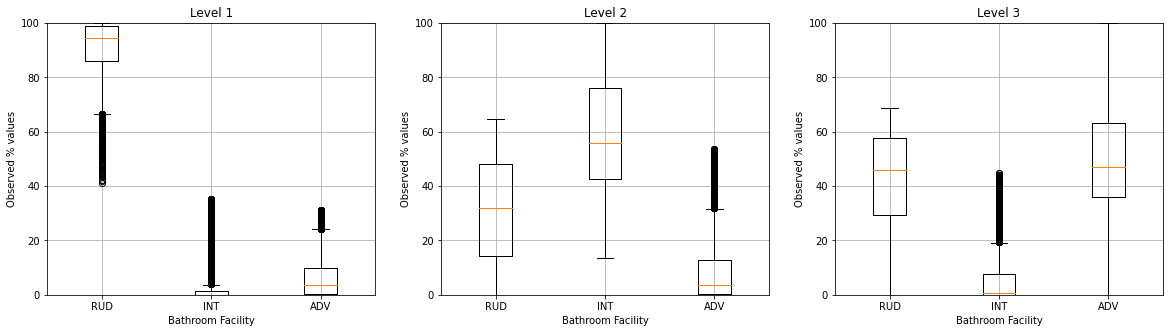

In [ ]:
7create_box_plots_2("BF",adi_and_household_bf_1,adi_and_household_bf_2,adi_and_household_bf_3,"Bathroom Facility")

In [ ]:
adi_and_household_fc_1 = adi_and_household[adi_and_household['FC_ADI']==1]
adi_and_household_fc_2 = adi_and_household[adi_and_household['FC_ADI']==2]
adi_and_household_fc_3 = adi_and_household[adi_and_household['FC_ADI']==3]


 Quantile for : Level 1

Q3: [100.0, 3.0, 4.1]
Q1: [89.7, 0.0, 0.0]

 Quantile for : Level 2

Q3: [19.1, 97.1, 4.9]
Q1: [0.4, 72.5, 0.0]

 Quantile for : Level 3

Q3: [61.2, 44.3, 37.5]
Q1: [39.8, 11.2, 1.9]


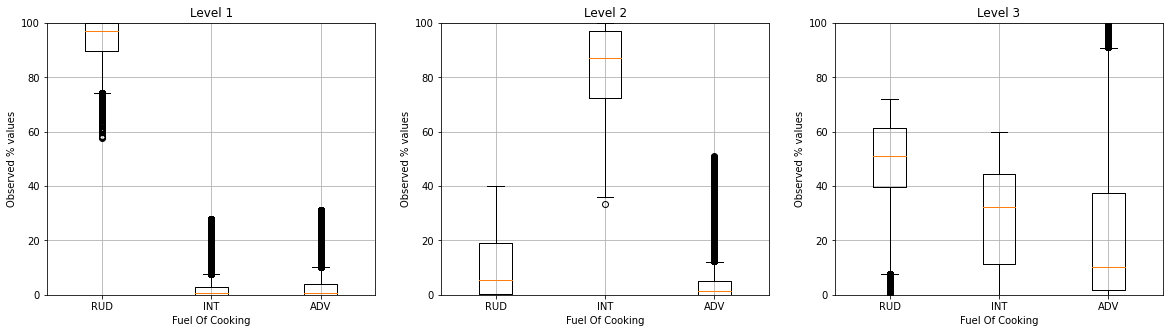

In [ ]:
create_box_plots_2("FC",adi_and_household_fc_1,adi_and_household_fc_2,adi_and_household_fc_3,"Fuel Of Cooking")

In [ ]:
adi_and_household_lit_1 = adi_and_household[adi_and_household['LIT_ADI']==1]
adi_and_household_lit_2 = adi_and_household[adi_and_household['LIT_ADI']==2]
adi_and_household_lit_3 = adi_and_household[adi_and_household['LIT_ADI']==3]


 Quantile for : Level 1

Q3: [40.3]
Q1: [29.3]

 Quantile for : Level 2

Q3: [57.4]
Q1: [49.2]

 Quantile for : Level 3

Q3: [72.6]
Q1: [64.1]


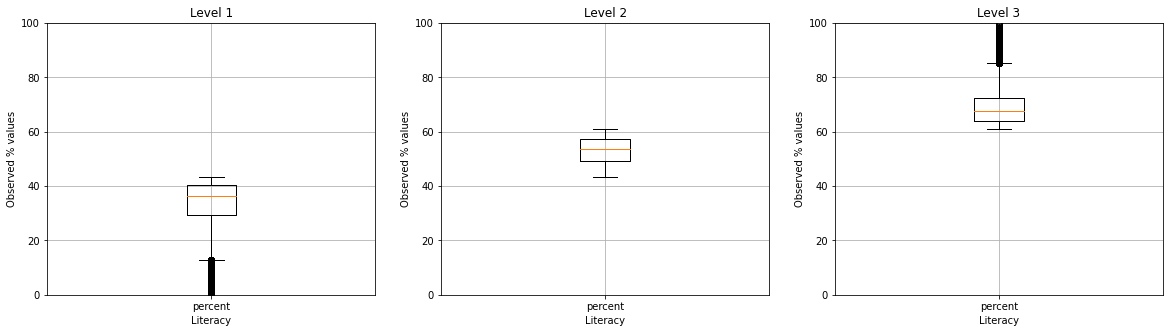

In [ ]:
create_box_plots_4("LIT",adi_and_household_lit_1,adi_and_household_lit_2,adi_and_household_lit_3,"Literacy")

In [ ]:
adi_and_household_msw_1 = adi_and_household[adi_and_household['MSW_ADI']==1]
adi_and_household_msw_2 = adi_and_household[adi_and_household['MSW_ADI']==2]
adi_and_household_msw_3 = adi_and_household[adi_and_household['MSW_ADI']==3]


 Quantile for : Level 1

Q3: [97.7, 36.1, 2.4]
Q1: [57.9, 0.0, 0.0]

 Quantile for : Level 2

Q3: [10.4, 99.1, 3.1]
Q1: [0.0, 79.2, 0.0]

 Quantile for : Level 3

Q3: [6.9, 25.7, 97.4]
Q1: [0.0, 0.0, 64.2]


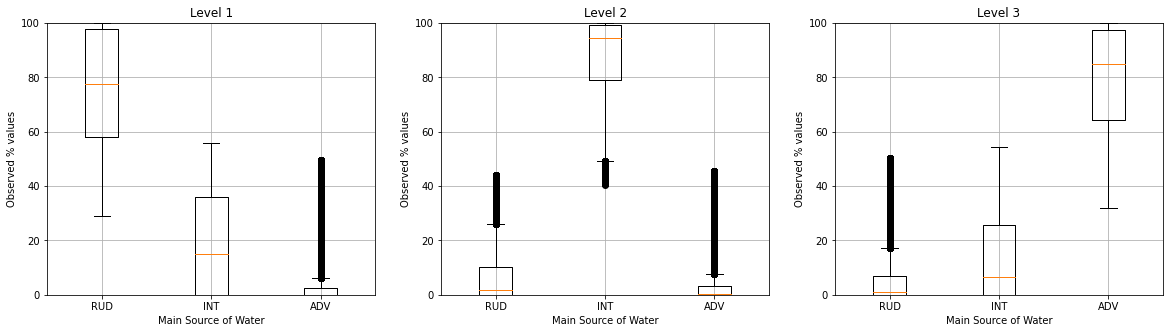

In [ ]:
create_box_plots_2("MSW",adi_and_household_msw_1,adi_and_household_msw_2,adi_and_household_msw_3,"Main Source of Water")

In [ ]:
adi_and_household_asset_1 = adi_and_household[adi_and_household['ASSET_ADI']==1]
adi_and_household_asset_2 = adi_and_household[adi_and_household['ASSET_ADI']==2]
adi_and_household_asset_3 = adi_and_household[adi_and_household['ASSET_ADI']==3]


 Quantile for : Level 1

Q3: [14.8, 31.7, 8.3, 0.7]
Q1: [1.0, 9.5, 1.9, 0.0]

 Quantile for : Level 2

Q3: [31.9, 73.5, 17.8, 2.3]
Q1: [11.5, 51.7, 7.6, 0.3]

 Quantile for : Level 3

Q3: [76.3, 86.1, 42.9, 6.4]
Q1: [51.0, 67.1, 21.3, 1.1]


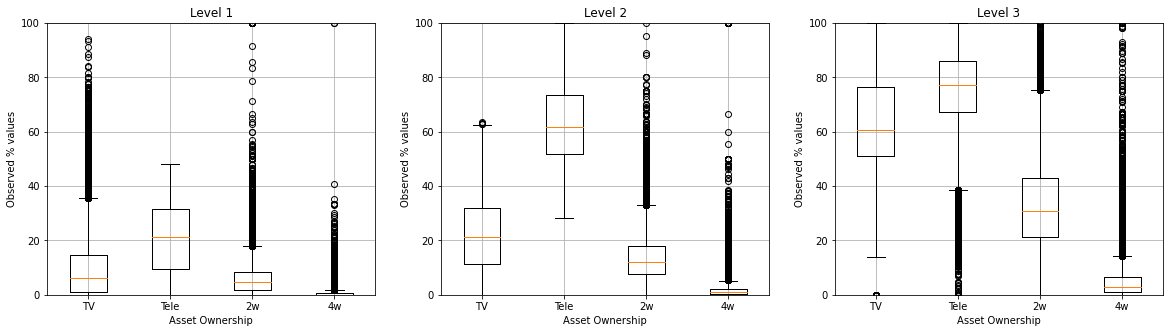

In [ ]:
create_box_plots_3("ASSET",adi_and_household_asset_1,adi_and_household_asset_2,adi_and_household_asset_3,"Asset Ownership")